In [ ]:

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt




ModuleNotFoundError: ignored

In [ ]:
x=np.arange(11)

mfx = fuzz.trimf(x,[0,5,10])
x
mfx

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

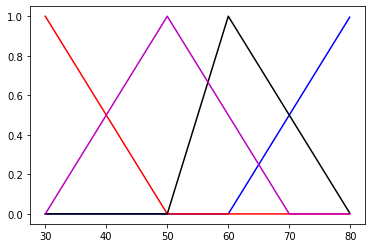

In [ ]:

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x=np.arange(30,80,0.1)
slow = fuzz.trimf(x,[30,30,50])
medium=fuzz.trimf(x,[30,50,70])
medium_fast=fuzz.trimf(x,[50,60,80])
full_speed=fuzz.trimf(x,[60,80,80])
plt.figure()
plt.plot(x, full_speed,'b',linewidth= 1.5, label='Full Speed')
plt.plot(x, slow,'r',linewidth= 1.5, label='Slow')
plt.plot(x, medium_fast,'k',linewidth= 1.5, label='Medium Speed')
plt.plot(x, medium, 'm',linewidth= 1.5, label='Medium')

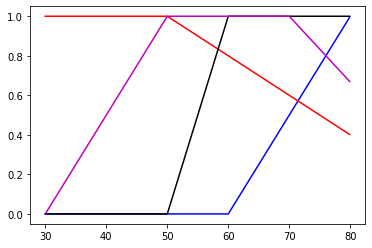

In [ ]:

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x=np.arange(30,80,0.1)
slow = fuzz.trapmf(x,[30,30,50,100])
medium=fuzz.trapmf(x,[30,50,70,100])
medium_fast=fuzz.trapmf(x,[50,60,80,100])
full_speed=fuzz.trapmf(x,[60,80,80,100])
plt.figure()
plt.plot(x, full_speed,'b',linewidth= 1.5, label='Full Speed')
plt.plot(x, slow,'r',linewidth= 1.5, label='Slow')
plt.plot(x, medium_fast,'k',linewidth= 1.5, label='Medium Speed')
plt.plot(x, medium, 'm',linewidth= 1.5, label='Medium')

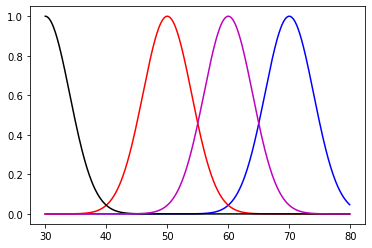

In [ ]:

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x=np.arange(30,80,0.1)
slow = fuzz.gaussmf(x,50,4)
medium=fuzz.gaussmf(x,60,4)
medium_fast=fuzz.gaussmf(x,30,4)
full_speed=fuzz.gaussmf(x,70,4)
plt.figure()
plt.plot(x, full_speed,'b',linewidth= 1.5, label='Full Speed')
plt.plot(x, slow,'r',linewidth= 1.5, label='Slow')
plt.plot(x, medium_fast,'k',linewidth= 1.5, label='Medium Speed')
plt.plot(x, medium, 'm',linewidth= 1.5, label='Medium')

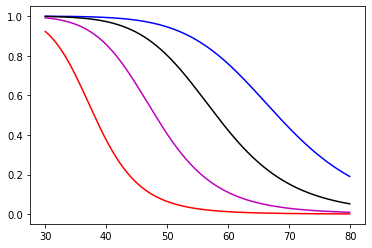

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x=np.arange(30,80,0.1)
slow = fuzz.gbellmf(x,30,4,8)
medium=fuzz.gbellmf(x,40,4,8)
medium_fast=fuzz.gbellmf(x,50,4,8)
full_speed=fuzz.gbellmf(x,60,4,8)
plt.figure()
plt.plot(x, full_speed,'b',linewidth= 1.5, label='Full Speed')
plt.plot(x, slow,'r',linewidth= 1.5, label='Slow')
plt.plot(x, medium_fast,'k',linewidth= 1.5, label='Medium Speed')
plt.plot(x, medium, 'm',linewidth= 1.5, label='Medium')

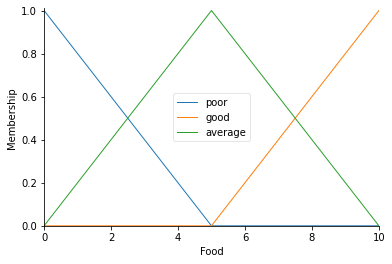

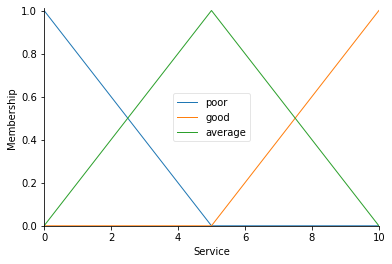

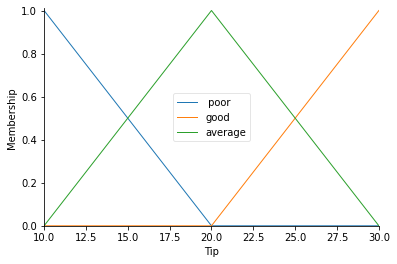

In [ ]:
import  numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'Food')
service = ctrl.Antecedent(np.arange(0,11,1),'Service')
tip = ctrl.Consequent(np.arange(10,31,1),'Tip')


food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['good']= fuzz.trimf(food.universe,[5,10,10])
food['average']= fuzz.trimf(food.universe,[0,5,10])


service['poor']= fuzz.trimf(service.universe,[0,0,5])
service['good']= fuzz.trimf(service.universe, [5,10,10])
service['average']= fuzz.trimf(service.universe,[0,5,10])

tip[' poor']= fuzz.trimf(tip.universe,[10,10,20])
tip['good']= fuzz.trimf(tip.universe,[20,30,30])
tip['average']= fuzz.trimf(tip.universe,[10,20,30])


food.view()
service.view()
tip.view()

25.515706032513773


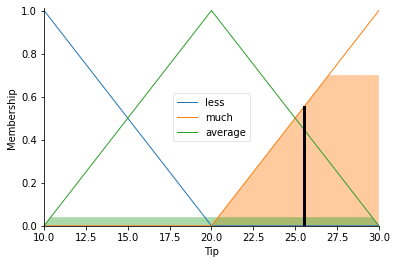

In [ ]:
import  numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'Food')
service = ctrl.Antecedent(np.arange(0,11,1),'Service')
tip = ctrl.Consequent(np.arange(10,31,1),'Tip')


food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['good']= fuzz.trimf(food.universe,[5,10,10])
food['average']= fuzz.trimf(food.universe,[0,5,10])


service['poor']= fuzz.trimf(service.universe,[0,0,5])
service['good']= fuzz.trimf(service.universe, [5,10,10])
service['average']= fuzz.trimf(service.universe,[0,5,10])

tip['less']= fuzz.trimf(tip.universe,[10,10,20])
tip['much']= fuzz.trimf(tip.universe,[20,30,30])
tip['average']= fuzz.trimf(tip.universe,[10,20,30])





rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['average'])
rule4 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['average'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['much'])
rule7 = ctrl.Rule(food['good']&service['poor'],tip['average'])
rule8 = ctrl.Rule(food['good']&service['average'],tip['much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])


tipping_ctrl= ctrl.ControlSystem([  rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food']=6.5
tipping.input['Service']=9.8
tipping.compute()
print(tipping.output['Tip'])
tip.view(sim=tipping)
